## Applicazione analisi Detection Histories

#### vedere questo link \\ https://sites.google.com/site/asrworkshop/home/schedule/r-occupancy-1
##### detection histories: i dati relativi alle storie di cattura sono archiviati in una tabella nella quale le righe rappresentano i siti di campionamento (le 50 e/o 75 trappole), e le colonne rappresentano le occasioni di cattura. I valori sono di tipo dicotomico (1= cattura si; 0= cattura no). 


In [1]:
# install.packages("unmarked")
library(dplyr)
library(readr)
library(unmarked)
require(stats4)
require(parallel)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: stats4


Attaching package: 'stats4'


The following object is masked from 'package:unmarked':

    mle


Loading required package: parallel



In [2]:
#### utilizziamo i dati relativi alle occasioni già elaborato
Datioccas <- read.csv("Dati-elaborati/Dati-occasioni.csv", dec=",", sep=";", header = TRUE)
tail(Datioccas)

,Data.R,Orario.R,occasione,ALBA..A.T.,sessione,trappole.posizionate,trappoleattive,n..trappole.inattive,ID.trappole.inattive,neve....S.N.,copertura.nuvolosa....8.,Sito,DOY,X,Anno,Precipitazioni,Temperatura.C
,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<lgl>,<int>,<dbl>,<dbl>
143,2018-08-31,07:00,30,A,2,50,50,0,NA,S,5/8,COGNE,243,NA,2018,0,8.6
144,2018-08-31,17:00,31,T,2,50,0,50,"1,50",S,8/8,COGNE,243,NA,2018,0,7.6
145,2018-09-01,07:00,32,A,2,50,0,50,"1,50",S,8/8,COGNE,244,NA,2018,0,4.0
146,2018-09-01,17:00,33,T,2,50,0,50,"1,50",S,8/8,COGNE,244,NA,2018,0,7.0
147,2018-09-02,07:00,34,A,2,50,0,50,"1,50",S,1/8,COGNE,245,NA,2018,0,7.2
148,2018-09-02,17:00,35,T,2,50,50,0,NA,S,8/8,COGNE,245,NA,2018,0,7.8


In [3]:
#### Inserire l'anno su cui si vuole effettuare l'analisi es. =="2014", "2015", ecc
anno_analisi <- "2018"
sessione_analisi <- "1"
anno_int <- Datioccas$Anno == anno_analisi
sessione_int <- Datioccas$sessione == sessione_analisi
Datioccas_ <- subset(Datioccas, anno_int & sessione_int)
orario_occasione_singola <- as.data.frame(t(select(Datioccas_, ALBA..A.T.)))

#trappole_posizionate <- max(Datioccas_$trappole.posizionate)
trappole_posizionate <- 75 # forzo il numero di trappole a 75
numero_occasioni <- nrow(Datioccas_)

# forziamo 75 trappole
trappole_posizionate <- 75
orario_occasione <- rbind(orario_occasione_singola[rep(1, trappole_posizionate), ])
orario_occasione <- as.matrix(orario_occasione)
rownames(orario_occasione) <- c(1:trappole_posizionate)

tail(orario_occasione)



,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132
70,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T
71,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T
72,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T
73,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T
74,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T
75,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T,A,T


In [4]:
#### ripetiamo gli step per quanto riguarda le precipitazioni
precip <- as.data.frame(t(select(Datioccas_, Precipitazioni)))
precipitazioni_occasione <- rbind(precip[rep(1, trappole_posizionate), ])
precipitazioni_occasione <- as.matrix(precipitazioni_occasione)
rownames(precipitazioni_occasione) <- c(1:trappole_posizionate)
tail(precipitazioni_occasione)

,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132
70,0,0,0,0,0,0,0,0,0.2,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0.2,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0.2,0,0,0,0,0,0,0,0,0,0
73,0,0,0,0,0,0,0,0,0.2,0,0,0,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0,0,0.2,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0.2,0,0,0,0,0,0,0,0,0,0


In [5]:
#### ripetiamo gli step per i dati relativi alle temperature
temp <- as.data.frame(t(select(Datioccas_, Temperatura.C)))
temperatura_occasione <- rbind(temp[rep(1, trappole_posizionate), ])
temperatura_occasione <- as.matrix(temperatura_occasione)
rownames(temperatura_occasione) <- c(1:trappole_posizionate)

tail(temperatura_occasione)

,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132
70,10.2,9.5,11.8,10.7,15.2,13.2,14.6,12.7,12.9,14.1,15.5,13.3,16.5,14.8,13.3,13.9,17.3,15.3,17.4
71,10.2,9.5,11.8,10.7,15.2,13.2,14.6,12.7,12.9,14.1,15.5,13.3,16.5,14.8,13.3,13.9,17.3,15.3,17.4
72,10.2,9.5,11.8,10.7,15.2,13.2,14.6,12.7,12.9,14.1,15.5,13.3,16.5,14.8,13.3,13.9,17.3,15.3,17.4
73,10.2,9.5,11.8,10.7,15.2,13.2,14.6,12.7,12.9,14.1,15.5,13.3,16.5,14.8,13.3,13.9,17.3,15.3,17.4
74,10.2,9.5,11.8,10.7,15.2,13.2,14.6,12.7,12.9,14.1,15.5,13.3,16.5,14.8,13.3,13.9,17.3,15.3,17.4
75,10.2,9.5,11.8,10.7,15.2,13.2,14.6,12.7,12.9,14.1,15.5,13.3,16.5,14.8,13.3,13.9,17.3,15.3,17.4


In [6]:
#### A questo punto selezionare il file detection histories relativo all'anno di studio interessato creato durante l'esecuzione dello script "Detection History catture"
occasioni_cattura <- read.csv(paste0("Dati-detection-history/Detection-Anno_", anno_analisi, "_Sessione_", sessione_analisi, ".csv"), dec=",", sep=";") 
occasioni_cattura <- subset( occasioni_cattura, select = -ID_TRAP)

tail(occasioni_cattura)

,occ.1,occ.2,occ.3,occ.4,occ.5,occ.6,occ.7,occ.8,occ.9,occ.10,occ.11,occ.12,occ.13,occ.14,occ.15,occ.16,occ.17,occ.18,occ.19
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## ANALISI DETECTION HISTORIES 
#### A questo punto, possiamo procedere con l'analisi delle detection histores. 

In [7]:
# Verifichiamo che i dataframe abbiano le stesse dimensioni
dim(orario_occasione)
dim(precipitazioni_occasione)
dim(temperatura_occasione)
dim(occasioni_cattura)
#Creiamo a questo punto una lista che contenga i dati in oggetto
obs.covs <- list(
    orario_occasione = matrix(c(orario_occasione), nrow=trappole_posizionate, ncol=numero_occasioni, byrow=FALSE),
    temperatura_occasione = matrix(c(temperatura_occasione), nrow=trappole_posizionate, ncol=numero_occasioni, byrow=FALSE),
    precipitazioni_occasione = matrix(c(precipitazioni_occasione), nrow=trappole_posizionate, ncol=numero_occasioni, byrow=FALSE)
)
#obs.covs

[1] 75 19

[1] 75 19

[1] 75 19

[1] 75 19

#### Carichiamo il file relativo alle covariate

In [8]:
dati.cov <- read.csv("Dati-elaborati/Dati-cov.csv", dec=",", sep=";")# da leggere file csv relativo alle covariate
dati.cov <- dati.cov[1:trappole_posizionate,]

head(dati.cov)
str(dati.cov)

,Diametro.roccia.1..cm.,Diametro.roccia.2..cm.,Diametro.roccia.3..cm.,alt_m,aspect_deg,slope_degr,n_species,dominant,Cop_Veg_2018_ottavi
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>,<int>
1,59,96,102,2782.206,234,13,23,Graminacee,5
2,176,42,76,2781.136,294,16,16,Graminacee,2
3,51,88,62,2781.067,310,0,13,Graminacee,2
4,99,30,36,2781.087,293,8,23,Graminacee,5
5,164,41,47,2781.887,294,11,21,Graminacee,2
6,130,31,36,2782.237,310,7,20,Graminacee,4


'data.frame':	75 obs. of  9 variables:
 $ Diametro.roccia.1..cm.: int  59 176 51 99 164 130 116 97 97 58 ...
 $ Diametro.roccia.2..cm.: int  96 42 88 30 41 31 38 94 48 34 ...
 $ Diametro.roccia.3..cm.: int  102 76 62 36 47 36 56 55 157 41 ...
 $ alt_m                 : num  2782 2781 2781 2781 2782 ...
 $ aspect_deg            : int  234 294 310 293 294 310 332 19 4 343 ...
 $ slope_degr            : int  13 16 0 8 11 7 0 6 0 0 ...
 $ n_species             : int  23 16 13 23 21 20 22 24 8 20 ...
 $ dominant              : Factor w/ 10 levels "Alchemilla alpina",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Cop_Veg_2018_ottavi   : int  5 2 2 5 2 4 2 2 3 3 ...


### UNMARKED DATA FRAME
#### Per la determinazione del miglior modello di occupancy, utilizziamo il pacchetto Unmarked e la funzione unmarkedFrameOccu

In [19]:
#str(obs.covs)
#str(dati.cov)
#str(occasioni_cattura)

In [10]:
## UNMARKED DATA FRAME
# ?unmarkedFrameOccu
# uniamo le detection histories e le covariate in unico dataframe "unmarked" e lo chiamiamo blgr
# blgr <- unmarkedFrameOccu(y = y, siteCovs = blgr.site, obsCovs = blgr.obs)
# y = capture histories (specifiche per la sessione 1 o la sessione 2)
# siteCovs = dati.cov, uguali per le due sessioni
# obsCovs alba/tramonto, specifico per la sessione 1 o la sessione 2
blgr <- unmarkedFrameOccu(y = occasioni_cattura, siteCovs=dati.cov, obsCovs=obs.covs) 
# which can be summarized by
#summary of unmarked data frame
summary(blgr)

unmarkedFrame Object

75 sites
Maximum number of observations per site: 19 
Mean number of observations per site: 19 
Sites with at least one detection: 17 

Tabulation of y observations:
   0    1 
1396   29 

Site-level covariates:
 Diametro.roccia.1..cm. Diametro.roccia.2..cm. Diametro.roccia.3..cm.
 Min.   : 30.0          Min.   : 28.00         Min.   :  8.00        
 1st Qu.: 65.0          1st Qu.: 44.00         1st Qu.: 40.00        
 Median : 97.0          Median : 61.00         Median : 57.00        
 Mean   :113.8          Mean   : 74.61         Mean   : 78.11        
 3rd Qu.:135.0          3rd Qu.: 92.00         3rd Qu.: 82.50        
 Max.   :440.0          Max.   :308.00         Max.   :292.00        
                                                                     
     alt_m        aspect_deg      slope_degr      n_species    
 Min.   :2778   Min.   :  0.0   Min.   : 0.00   Min.   : 0.00  
 1st Qu.:2783   1st Qu.: 36.0   1st Qu.: 8.00   1st Qu.:10.00  
 Median :2789 

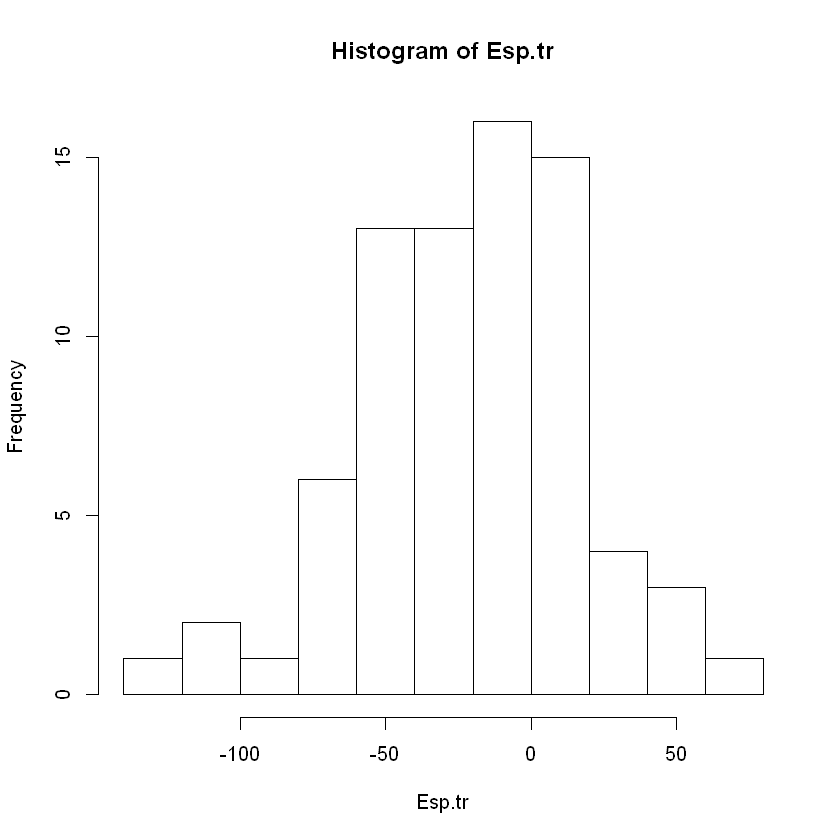

In [11]:
# Possiamo calcolare la mediana e intervallo interquartile del diametro delle rocce
MDR <- apply(dati.cov[,1:3], 1, median)
IQR <- apply(dati.cov[,1:3], 1, IQR)
# trasformo i dati dell'esposizione
# trasformazione e successiva analisi dei dati di esposizione
# expc <- circular(sc$aspect_deg, type="angles", units="degrees", template='none', zero=0, rotation="clock")
# plot(expc)
Esp.tr <- vector("numeric", length(dati.cov$aspect_deg))
for (i in 1:length(dati.cov$aspect_deg)) {
  if (dati.cov$aspect_deg[i] > 180) Esp.tr[i] <- dati.cov$aspect_deg[i]-360 else Esp.tr[i] <- dati.cov$aspect_deg[i]
}
hist(Esp.tr)

## Outlier detection

#### Procediamo all'analis degli outlier

In [12]:
# raggruppo i dati delle specie vegetali dominanti, facendo soltanto 3 gruppi: graminacee, muschio, tutte le altre
specie_dominante <- as.character(dati.cov$dominant)
specie_dominante[specie_dominante != "Graminacee" & specie_dominante != "Muschio"]  <- "Other_sp"

dati.cov.interesse <- cbind(dati.cov, MDR, IQR, Esp.tr, specie_dominante)
dati.cov.interesse <- dati.cov.interesse[,c("slope_degr","n_species","Cop_Veg_2018_ottavi","MDR","IQR","Esp.tr","specie_dominante")]


head(dati.cov.interesse)

,slope_degr,n_species,Cop_Veg_2018_ottavi,MDR,IQR,Esp.tr,specie_dominante
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
1,13,23,5,96,21.5,-126,Graminacee
2,16,16,2,76,67.0,-66,Graminacee
3,0,13,2,62,18.5,-50,Graminacee
4,8,23,5,36,34.5,-67,Graminacee
5,11,21,2,47,61.5,-66,Graminacee
6,7,20,4,36,49.5,-50,Graminacee


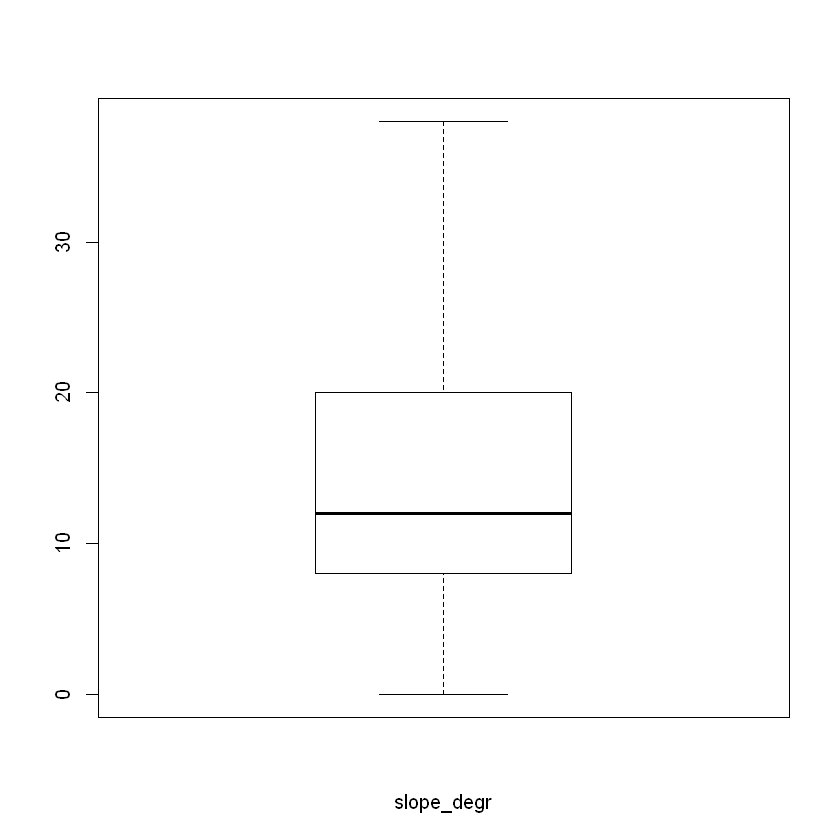

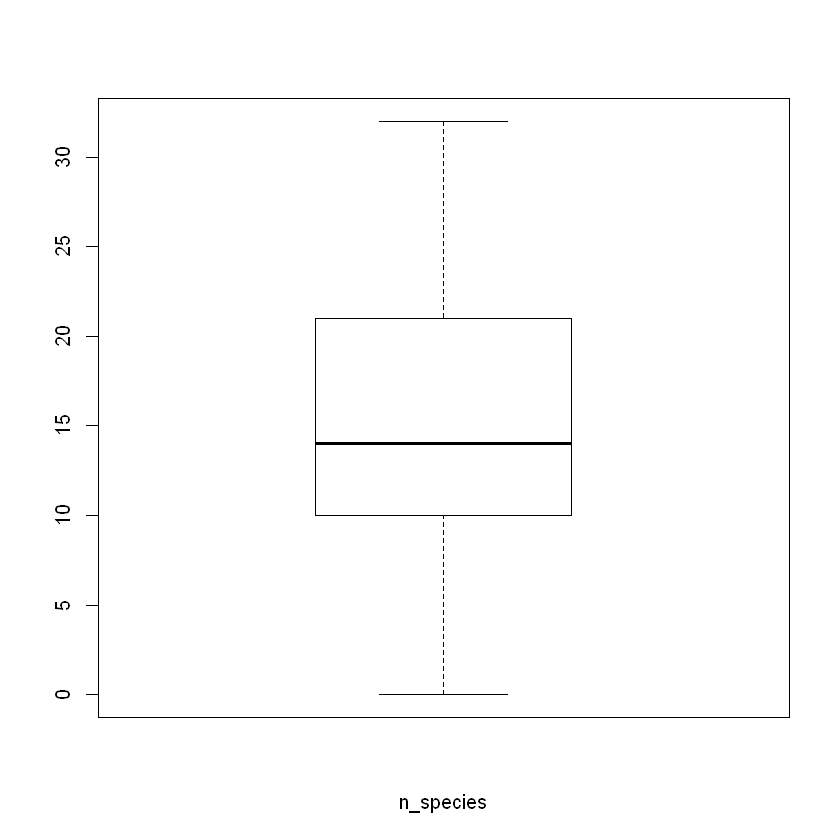

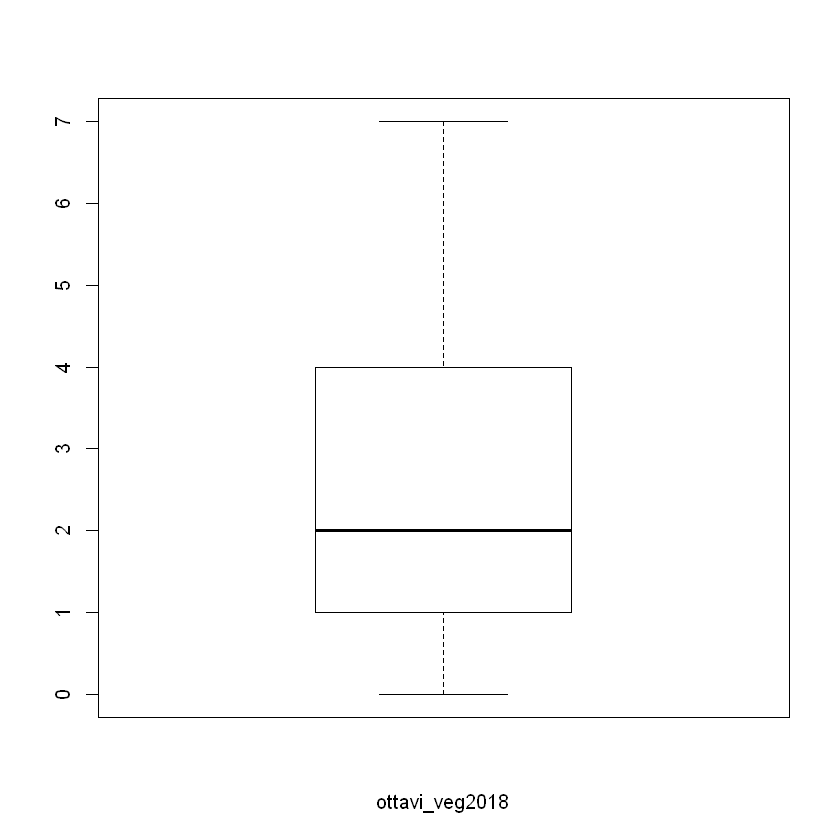

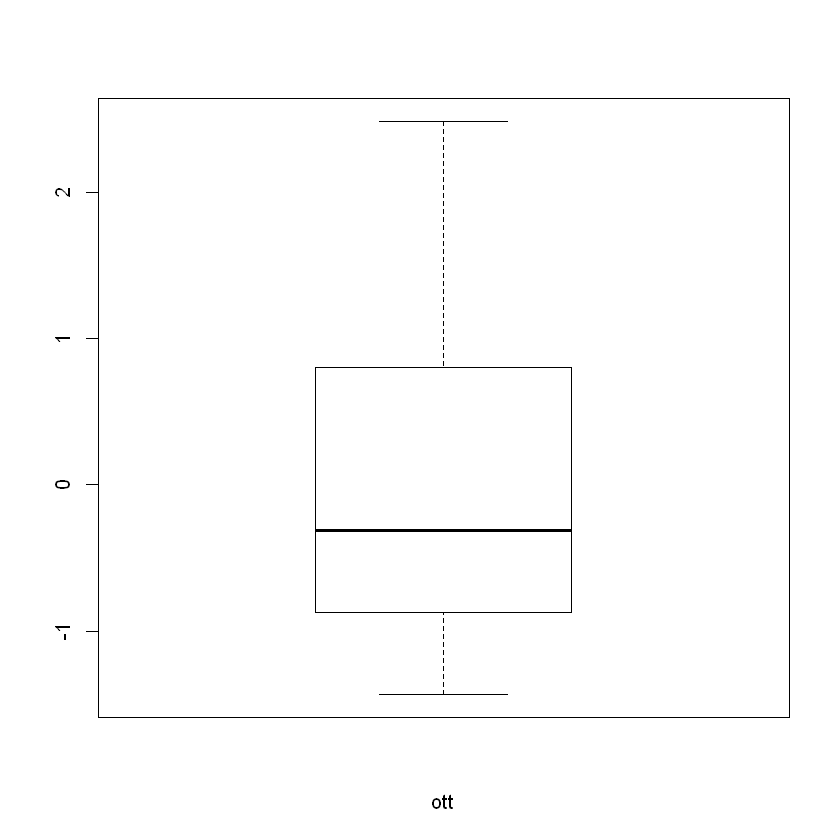

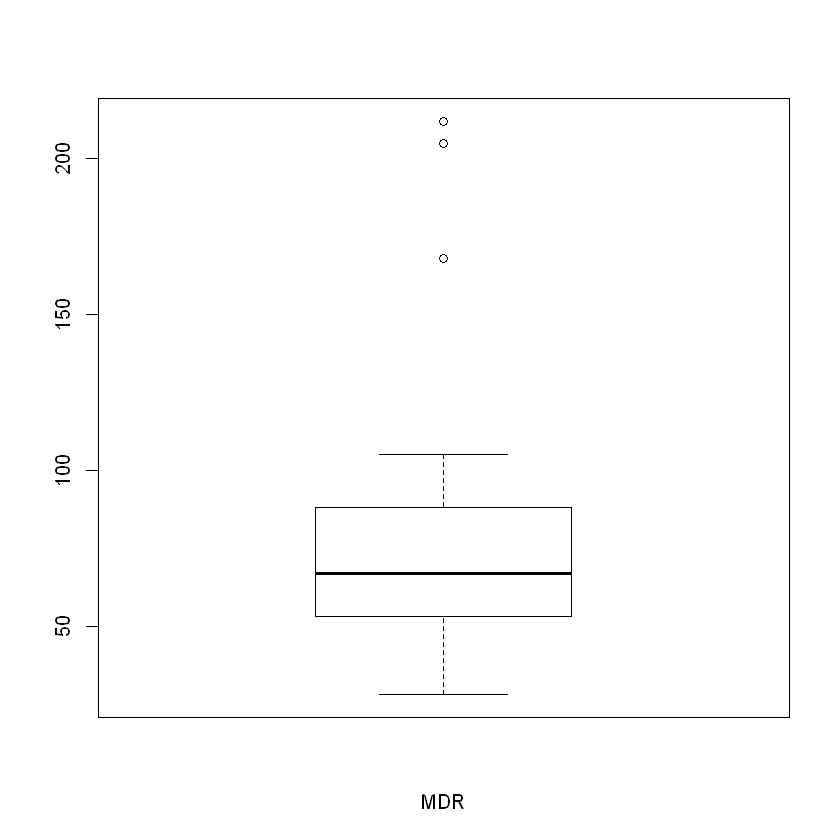

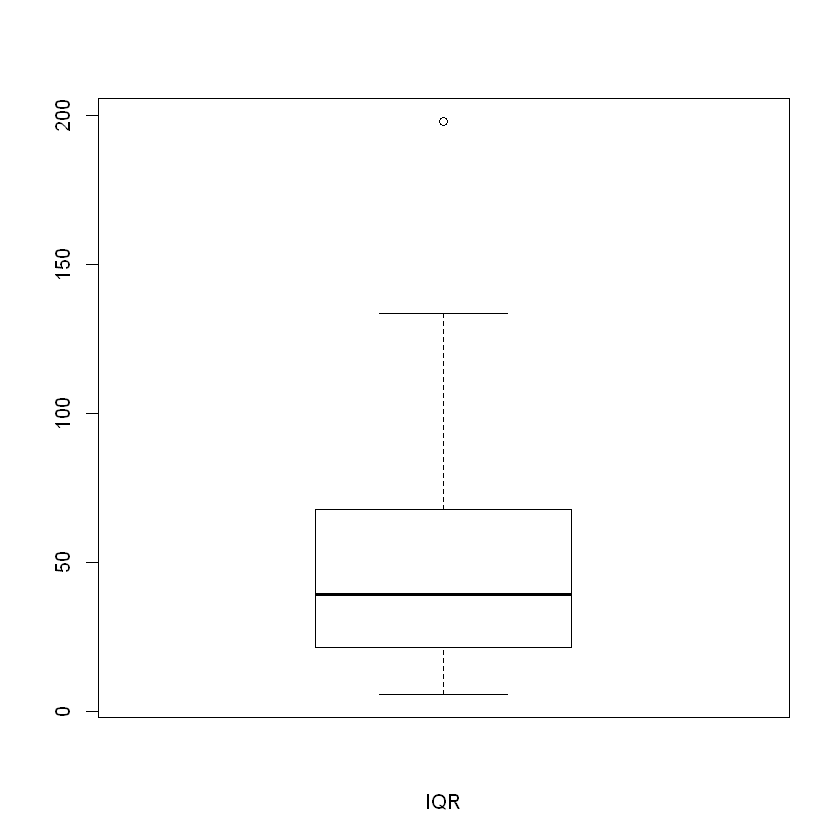

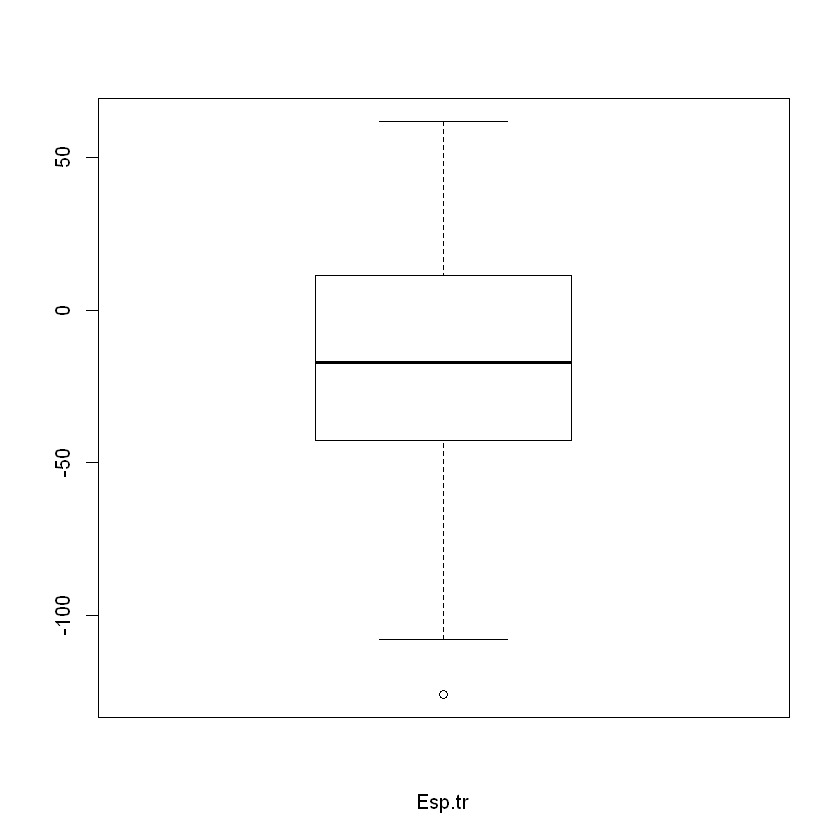

In [13]:
#### si può procedere a fare l'analisi esplorativa sul dataset sc.def e standardizzare ottavi_veg2018 (vedi la funzione 'scale')

dati.cov.interesse$ott <- scale(dati.cov.interesse$Cop_Veg_2018_ottavi)
# outlier detection
boxplot(dati.cov.interesse$slope_degr, xlab="slope_degr")
boxplot(dati.cov.interesse$n_species, xlab="n_species")
boxplot(dati.cov.interesse$Cop_Veg_2018_ottavi, xlab="ottavi_veg2018")
boxplot(dati.cov.interesse$ott, xlab="ott")
boxplot(dati.cov.interesse$MDR, xlab="MDR")
boxplot(dati.cov.interesse$IQR, xlab="IQR")
boxplot(dati.cov.interesse$Esp.tr, xlab="Esp.tr")
#


## Collinearità

Loading required package: ggplot2



,slope_degr,n_species,MDR,IQR,Esp.tr,ott
slope_degr,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
n_species,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
MDR,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
IQR,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
Esp.tr,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
ott,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


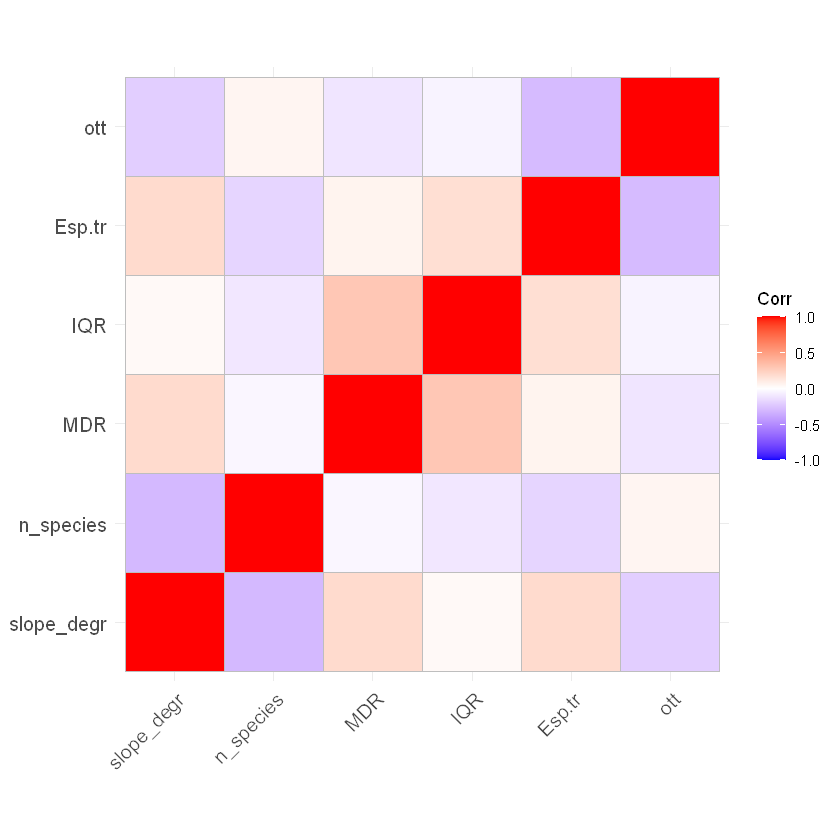

unmarkedFrame Object

75 sites
Maximum number of observations per site: 19 
Mean number of observations per site: 19 
Sites with at least one detection: 17 

Tabulation of y observations:
   0    1 
1396   29 

Site-level covariates:
   slope_degr      n_species     Cop_Veg_2018_ottavi      MDR        
 Min.   : 0.00   Min.   : 0.00   Min.   :0.00        Min.   : 28.00  
 1st Qu.: 8.00   1st Qu.:10.00   1st Qu.:1.25        1st Qu.: 53.00  
 Median :12.00   Median :14.00   Median :2.00        Median : 67.00  
 Mean   :13.27   Mean   :15.15   Mean   :2.56        Mean   : 73.27  
 3rd Qu.:20.00   3rd Qu.:21.00   3rd Qu.:4.00        3rd Qu.: 88.00  
 Max.   :38.00   Max.   :32.00   Max.   :7.00        Max.   :212.00  
                                 NA's   :25                          
      IQR             Esp.tr          specie_dominante       ott.V1       
 Min.   :  5.50   Min.   :-126.00   Graminacee:39      Min.   :-1.433279  
 1st Qu.: 21.25   1st Qu.: -42.50   Muschio   :16      1

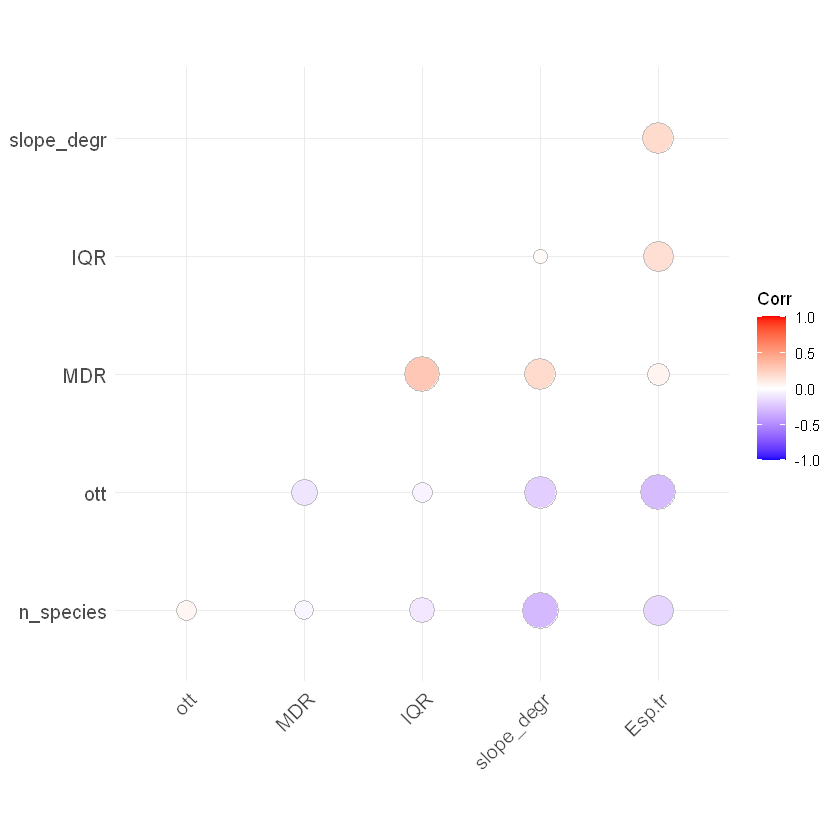

In [14]:
# collinearità
library(ggcorrplot)
cor.matrix <- cor(na.omit(dati.cov.interesse[,c("slope_degr","n_species","MDR","IQR","Esp.tr","ott")]))
ggcorrplot(cor.matrix)
p.mat <- (cor.matrix > 0.7)
p.mat
ggcorrplot(cor.matrix,
           hc.order = TRUE, method = "circle",
           type = "lower", p.mat = p.mat
)

siteCovs(blgr) <- dati.cov.interesse
#
# controllo
summary(blgr)


#### Indici di correlazione tra le variabili esplicative, ottenuti utilizzando l'indice di Pearson. Notare che non risultano variabili altamente correlate.

## Basic model: homogeneous detection and occupancy

In [21]:
## BASE MODEL
#siteCovs(blgr)
fm.base <- occu(~orario_occasione + MDR + temperatura_occasione + precipitazioni_occasione
                ~slope_degr + I(slope_degr^2) +
                  MDR + I(MDR^2) +
                  IQR + I(IQR^2) +
                  ott + I(ott^2) +
                  n_species + I(n_species^2) +
                  Esp.tr + I(Esp.tr^2) +
                  specie_dominante,
                blgr)
fm.base

Warning message:
"Some observations have been discarded because corresponding covariates were missing."
Warning message:
"25 sites have been discarded because of missing data."
Warning message in sqrt(diag(vcov(obj))):
"Si è prodotto un NaN"



Call:
occu(formula = ~orario_occasione + MDR + temperatura_occasione + 
    precipitazioni_occasione ~ slope_degr + I(slope_degr^2) + 
    MDR + I(MDR^2) + IQR + I(IQR^2) + ott + I(ott^2) + n_species + 
    I(n_species^2) + Esp.tr + I(Esp.tr^2) + specie_dominante, 
    data = blgr)

Occupancy:
                          Estimate       SE         z P(>|z|)
(Intercept)              -0.001002      NaN       NaN     NaN
slope_degr               -0.002158 0.423159 -5.10e-03 0.99593
I(slope_degr^2)           0.002591      NaN       NaN     NaN
MDR                       0.037968      NaN       NaN     NaN
I(MDR^2)                  0.002156      NaN       NaN     NaN
IQR                      -0.012473 0.095150 -1.31e-01 0.89571
I(IQR^2)                 -0.001066      NaN       NaN     NaN
ott                      -0.003001 2.495321 -1.20e-03 0.99904
I(ott^2)                 -0.004170      NaN       NaN     NaN
n_species                -0.011206      NaN       NaN     NaN
I(n_species^2)        

In [22]:
#siteCovs(blgr)$orario_occasione
tmp <- obsCovs(blgr)$temperatura_occasione
str(tmp)
summary(tmp)
length(tmp)
dim(tmp)
sum(is.na(tmp))

 num [1:1425] 10.2 9.5 11.8 10.7 15.2 13.2 14.6 12.7 12.9 14.1 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    9.5    12.7    13.9    13.8    15.3    17.4 

[1] 1425

NULL

[1] 0

### Parte "informatica"
#### Set up the cluster

In [23]:
clusterType <- if(length(find.package("snow", quiet = TRUE))) "SOCK" else "PSOCK"
clust <- try(makeCluster(getOption("cl.cores", 2), type = clusterType))
clusterEvalQ(clust, library(unmarked))
clusterEvalQ(clust,library(MuMIn))
clusterExport(clust, "blgr")
invisible(clusterCall(clust, "library", "stats4", character.only = TRUE))
library(MuMIn)
getAllTerms(fm.base)

[[1]]
[1] "unmarked"  "lattice"   "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[2]]
[1] "unmarked"  "lattice"   "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"

[[1]]
 [1] "MuMIn"     "unmarked"  "lattice"   "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "MuMIn"     "unmarked"  "lattice"   "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"

[1] "p(MDR)"                      "p(orario_occasione)"        
 [3] "p(precipitazioni_occasione)" "p(temperatura_occasione)"   
 [5] "psi(Esp.tr)"                 "psi(I(Esp.tr^2))"           
 [7] "psi(IQR)"                    "psi(I(IQR^2))"              
 [9] "psi(MDR)"                    "psi(I(MDR^2))"              
[11] "psi(n_species)"              "psi(I(n_species^2))"        
[13] "psi(ott)"                    "psi(I(ott^2))"              
[15] "psi(slope_degr)"             "psi(I(slope_degr^2))"       
[17] "psi(specie_dominante)"      
attr(,"intercept")
  p psi 
  1   1 
attr(,"interceptLabel")
[1] "p(Int)"   "psi(Int)"
attr(,"deps")
                            p(MDR) p(orario_occasione)
p(MDR)                          NA               FALSE
p(orario_occasione)          FALSE                  NA
p(precipitazioni_occasione)  FALSE               FALSE
p(temperatura_occasione)     FALSE               FALSE
psi(Esp.tr)                  FALSE               FALSE
psi(I(Esp.tr^2))             FALSE               FALSE
psi(IQR)                     FALSE               FALSE
psi(I(IQR^2))                FALSE               FALSE
psi(MDR)                     FALSE               FALSE
psi(I(MDR^2))                FALSE               FALSE
psi(n_species)               FALSE               FALSE
psi(I(n_species^2))          FALSE               FALSE
psi(ott)                     FALSE               FALSE
psi(I(ott^2))                FALSE               FALSE
psi(slope_degr)              FALSE               FALSE
psi(I(slope_degr^2))         FALSE               FALSE
psi(specie_dominante)        FALSE               FALSE
                            p(precipitazioni_occasione)
p(MDR)                                            FALSE
p(orario_occasione)                               FALSE
p(precipitazioni_occasione)                          NA
p(temperatura_occasione)                          FALSE
psi(Esp.tr)                                       FALSE
psi(I(Esp.tr^2))                                  FALSE
psi(IQR)                                          FALSE
psi(I(IQR^2))                                     FALSE
psi(MDR)                                          FALSE
psi(I(MDR^2))                                     FALSE
psi(n_species)                                    FALSE
psi(I(n_species^2))                               FALSE
psi(ott)                                          FALSE
psi(I(ott^2))                                     FALSE
psi(slope_degr)                                   FALSE
psi(I(slope_degr^2))                              FALSE
psi(specie_dominante)                             FALSE
                            p(temperatura_occasione) psi(Esp.tr)
p(MDR)                                         FALSE       FALSE
p(orario_occasione)                            FALSE       FALSE
p(precipitazioni_occasione)                    FALSE       FALSE
p(temperatura_occasione)                          NA       FALSE
psi(Esp.tr)                                    FALSE          NA
psi(I(Esp.tr^2))                               FALSE       FALSE
psi(IQR)                                       FALSE       FALSE
psi(I(IQR^2))                                  FALSE       FALSE
psi(MDR)                                       FALSE       FALSE
psi(I(MDR^2))                                  FALSE       FALSE
psi(n_species)                                 FALSE       FALSE
psi(I(n_species^2))                            FALSE       FALSE
psi(ott)                                       FALSE       FALSE
psi(I(ott^2))                                  FALSE       FALSE
psi(slope_degr)                                FALSE       FALSE
psi(I(slope_degr^2))                           FALSE       FALSE
psi(specie_dominante)                          FALSE       FALSE
                            psi(I(Esp.tr^2)) psi(IQR) psi(I(IQR^2)) psi(MDR)
p(MDR)                                 FALSE    FALSE         FALSE    FALSE
p(orario_occasione)    

In [29]:
## qui avvia la procedura di selezione automatica, con dredge (come per modelli di regressione "normali")
## mettendo i vincoli sulla presenza del termine al quadrato e escludendo le variabili troppo correlate 
pdd2 <- pdredge(fm.base, clust,
                subset = (`psi(slope_degr)` | !`psi(I(slope_degr^2))`) &&
                 (`psi(MDR)` | !`psi(I(MDR^2))`) &&
                 (`psi(IQR)` | !`psi(I(IQR^2))`) &&
                 #(`psi(ott)' | !'psi(I(ott^2))`) &&
                 (`psi(n_species)` | !`psi(I(n_species^2))`) &&
                 (`psi(Esp.tr)` | !`psi(I(Esp.tr^2))`),
                 #`psi(specie_dominante)`,
                 #('p(MDR)' | ! 'p(orario_occasione)')&&
                 #('p(precipitazioni_occasione)'| ! 'p(temperatura_occasione)'),
                
                trace = 2, m.lim = c(1,NA))
#pdd2
save(pdd2, file="Dati-elaborati/pdd2_sessione1.RData", compress=FALSE)
load("Dati-elaborati/pdd2_sessione1.RData")

Fixed terms are "p(Int)" and "psi(Int)"



  |                                                                      |   0%

ERROR: Error in checkForRemoteErrors(val): 2 nodes produced errors; first error: Lapack routine dgesv: system is exactly singular: U[1,1] = 0


In [49]:
## risultati
## PLOTTATO I RISULTATI DELLA SELEZIONE AUTOMATICA
## grafico da riportare nei risultati
par(mfrow = c(1,1))
op <- par(mar = c(3,5,6,4), mfrow=c(1,1))
plot(pdd2, labAsExpr = TRUE)
par(op)


## VEDIAMO I RISULTATI DEL MODELLO MIGLIORE
summary(get.models(pdd2, 1)[[1]])
# riportare la tabella dei coefficienti
## PASSAGGIO DI MODEL AVERAGING: CONSIDERIAMO CONTEMPORANEAMENTE I MODELLI MIGLIORI CHE DIFFERISCONO TRA LORO
## DI POCO IN TERMINI DI AIC (deltaAIC < 2)
summary(model.avg(pdd2, subset = delta < 2))

# # So we get estimates and an AIC value, but the estimates are on the logit scale.  
# # The built-in function backTransform() will provide the real scale estimates of detection ('det') 
# # and occupancy ('state')
# # back transformations
# best.mod1 <- occu(~alba
#                   ~ poly(Incl, degree=2, raw=TRUE) +
#                     poly(NSpecie, degree=2, raw=TRUE) +
#                     # NSpecie + I(NSpecie^2) +
#                     mediana.rocce +
#                     Esp.tr, # + I(Esp.tr^2),
#                  blgr)
# backTransform(best.mod,'det') 
# backTransform(best.mod, 'state')

## questa parte stima il numero di siti occupati ma non ci serve
# Finally, unmarked provide an Emprical Bayes estimate and confidence interval of the number/ proportion of study sites occupied.  This method essentially uses the estimate of psi to generate a vector of 0,1 binary variables z under the premise that z~Bernoulli(psi); the sum of the mode, lower, and upper quantiles from this simulation then provides an empirical CI on then number / proportion of occupied sites.  To generate this for the first model estimates we use
#empirical Bayes estimate of proportion of sites occupied
s<-nrow(y)
re <- ranef(get.models(pdd2, 1)[[1]])
EBUP <- bup(re, stat="mode")
CI <- confint(re, level=0.95)
print("95 % EB interval on number sites occupied")
rbind(s_occup = c(Estimate = sum(EBUP), colSums(CI)) )
print("95 % EB interval on proportion of sites occupied")
rbind(PAO = c(Estimate = sum(EBUP), colSums(CI))/s )
# If you compare this statistic to the back-tranformed estimate of psi you'll notice it is somewhat lower.  
# Conceptually this represents the proportion of the finite sample (41 in this case) of sites occupied, 
# whereas psi estimates the probability of occupancy from an infinite list of sites.


ERROR: Error in plot(pdd2, labAsExpr = TRUE): oggetto "pdd2" non trovato


In [33]:
best.mod <- occu(~ MDR + temperatura_occasione
                 ~ MDR +
                   Esp.tr +
                   specie_dominante,
                 blgr)
# ?unmarkedFitOccu-class
# Predict abundance at specified covariate values.
newdat1 <- data.frame(MDR = mean(dati.cov.interesse$MDR),
                     Esp.tr = seq(min(dati.cov.interesse$Esp.tr), max(dati.cov.interesse$Esp.tr), length=100),
                     specie_dominante = "Graminacee")
newdat2 <- data.frame(MDR = mean(dati.cov.interesse$MDR),
                      Esp.tr = seq(min(dati.cov.interesse$Esp.tr), max(dati.cov.interesse$Esp.tr), length=100),
                      specie_dominante = "Muschio")
newdat3 <- data.frame(MDR = mean(dati.cov.interesse$MDR),
                      Esp.tr = seq(min(dati.cov.interesse$Esp.tr), max(dati.cov.interesse$Esp.tr), length=100),
                      specie_dominante = "Other_sp")
newdat <- rbind(newdat1,newdat2,newdat3)
Elambda <- predict(best.mod, type='state', newdata=newdat,
                   appendData=TRUE)
head(Elambda)
Elambda.logit <- Elambda



,Predicted,SE,lower,upper,MDR,Esp.tr,specie_dominante
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.9999924,3.538656e-05,0.9321233,1,73.26667,-126.0000,Graminacee
2,0.9999910,4.157629e-05,0.9290742,1,73.26667,-124.1010,Graminacee
3,0.9999893,4.883975e-05,0.9258885,1,73.26667,-122.2020,Graminacee
4,0.9999872,5.736134e-05,0.9225602,1,73.26667,-120.3030,Graminacee
5,0.9999848,6.735680e-05,0.9190831,1,73.26667,-118.4040,Graminacee
6,0.9999818,7.907841e-05,0.9154507,1,73.26667,-116.5051,Graminacee


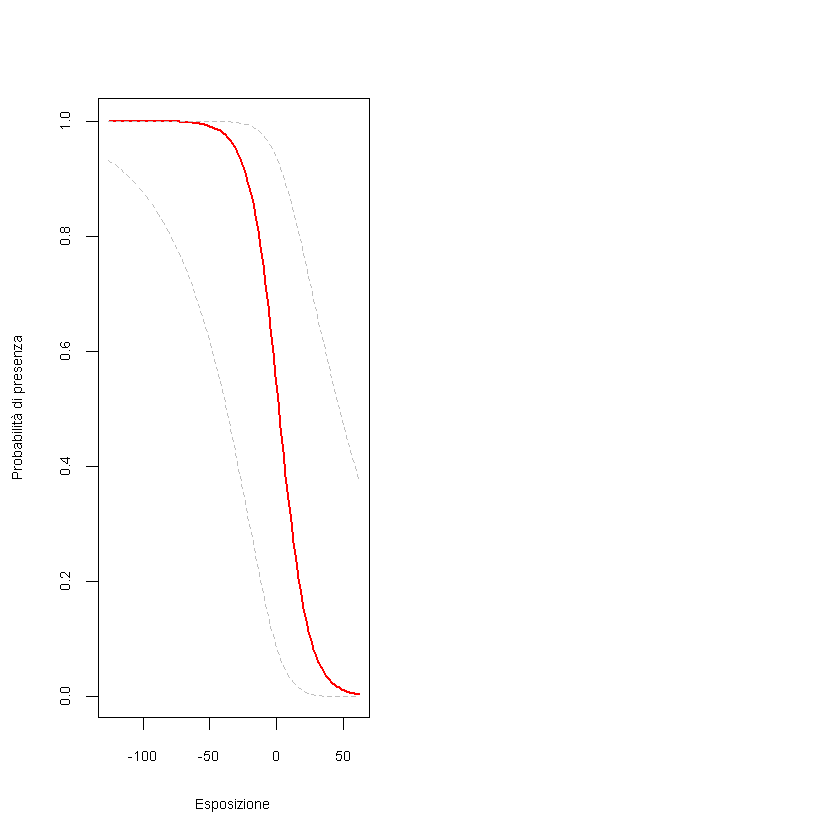

In [34]:
# Elambda.logit$Predicted <- log(Elambda.logit$Predicted/(1-Elambda.logit$Predicted))
# Elambda.logit$SE <- log(Elambda.logit$SE/(1-Elambda.logit$SE))
# Elambda.logit$lower <- log(Elambda.logit$lower/(1-Elambda.logit$lower))
# Elambda.logit$upper <- log(Elambda.logit$upper/(1-Elambda.logit$upper))
# with(Elambda, log(Predicted)-log(1-Predicted))
par(mfrow=c(1, 2))
# with(Elambda, {
#   plot(Esp.tr, log(Predicted)-log(1-Predicted), xlab="Esposizione", type="l", # names = habitat,
#                ylab="Occupancy", #ylim=c(-20, 40), # cex.names=0.7,
#                cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
#   lines(Esp.tr, log(Predicted)-log(1-Predicted)+log(SE/1-SE), lty=3, col="grey")
#   lines(Esp.tr, log(Predicted)-log(1-Predicted)-log(SE/1-SE), lty=2, col="grey")
# })
with(subset(Elambda.logit,specie_dominante=="Graminacee"), {
  plot(Esp.tr, Predicted, xlab="Esposizione", type="l", # names = habitat,
       ylab="Probabilità di presenza", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
  # lines(Esp.tr, Predicted+SE, lty=3, col="dark grey")
  # lines(Esp.tr, Predicted-SE, lty=3, col="dark grey")
  lines(Esp.tr, upper, lty=2, col="grey")
  lines(Esp.tr, lower, lty=2, col="grey")
})


,Predicted,SE,lower,upper,MDR,Esp.tr,specie_dominante
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.111529e-05,5.161369e-05,1.239762e-09,0.09062648,28.00000,-19.49333,Graminacee
2,1.924539e-05,8.510433e-05,3.312810e-09,0.10056430,29.85859,-19.49333,Graminacee
3,3.332195e-05,1.399946e-04,8.840888e-09,0.11158588,31.71717,-19.49333,Graminacee
4,5.769384e-05,2.296916e-04,2.355825e-08,0.12381212,33.57576,-19.49333,Graminacee
5,9.988972e-05,3.757852e-04,6.266482e-08,0.13738015,35.43434,-19.49333,Graminacee
6,1.729413e-04,6.128629e-04,1.663397e-07,0.15244693,37.29293,-19.49333,Graminacee


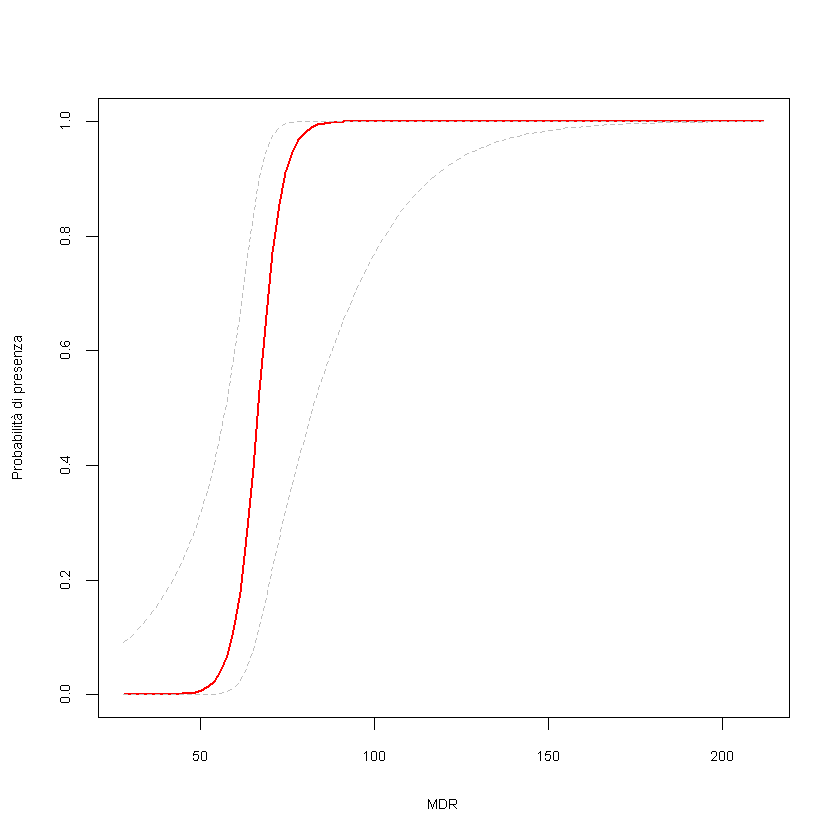

In [35]:
# with(subset(Elambda.logit,dominante=="Graminacee"), {
#   plot(Esp.tr, Predicted, xlab="Esposizione", type="l", # names = habitat,
#        ylab="Probabilità di presenza", #ylim=c(-20, 40), # cex.names=0.7,
#        cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
#   lines(Esp.tr, Predicted+SE, lty=3, col="dark grey")
#   lines(Esp.tr, Predicted-SE, lty=3, col="dark grey")
#   # lines(Esp.tr, upper, lty=2, col="grey")
#   # lines(Esp.tr, lower, lty=2, col="grey")
# })
# Predict abundance at specified covariate values.
newdat1 <- data.frame(MDR = seq(min(dati.cov.interesse$MDR), max(dati.cov.interesse$MDR), length=100),
                      Esp.tr = mean(dati.cov.interesse$Esp.tr),
                      specie_dominante = "Graminacee")
newdat2 <- data.frame(MDR = seq(min(dati.cov.interesse$MDR), max(dati.cov.interesse$MDR), length=100),
                      Esp.tr = mean(dati.cov.interesse$Esp.tr),
                      specie_dominante = "Muschio")
newdat3 <- data.frame(MDR = seq(min(dati.cov.interesse$MDR), max(dati.cov.interesse$MDR), length=100),
                      Esp.tr = mean(dati.cov.interesse$Esp.tr),
                      specie_dominante = "Other_sp")
newdat <- rbind(newdat1,newdat2,newdat3)
Elambda <- predict(best.mod, type='state', newdata=newdat,
                   appendData=TRUE)
head(Elambda)
Elambda.logit <- Elambda
with(subset(Elambda.logit,specie_dominante=="Graminacee"), {
  plot(MDR, Predicted, xlab="MDR", type="l", # names = habitat,
       ylab="Probabilità di presenza", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
  # lines(MDR, Predicted+SE, lty=3, col="dark grey")
  # lines(MDR, Predicted-SE, lty=3, col="dark grey")
  lines(MDR, upper, lty=2, col="grey")
  lines(MDR, lower, lty=2, col="grey")
})



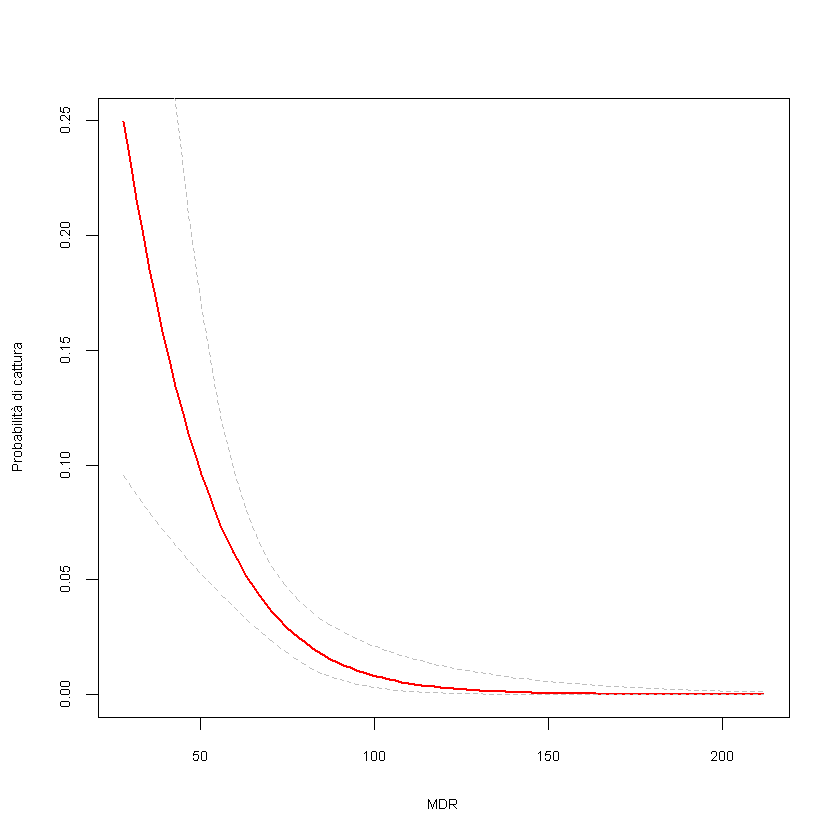

In [42]:
newdat1 <- data.frame(MDR = seq(min(dati.cov.interesse$MDR), max(dati.cov.interesse$MDR), length=100),
                      temperatura_occasione = mean(temperatura_occasione, na.rm=TRUE))
Elambda.det <- predict(best.mod, type='det', newdata=newdat1,
                   appendData=TRUE)
with(Elambda.det, {
  plot(MDR, Predicted, xlab="MDR", type="l", # names = habitat,
       ylab="Probabilità di cattura", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
  # lines(MDR, Predicted+SE, lty=3, col="dark grey")
  # lines(MDR, Predicted-SE, lty=3, col="dark grey")
  lines(MDR, upper, lty=2, col="grey")
  lines(MDR, lower, lty=2, col="grey")
})

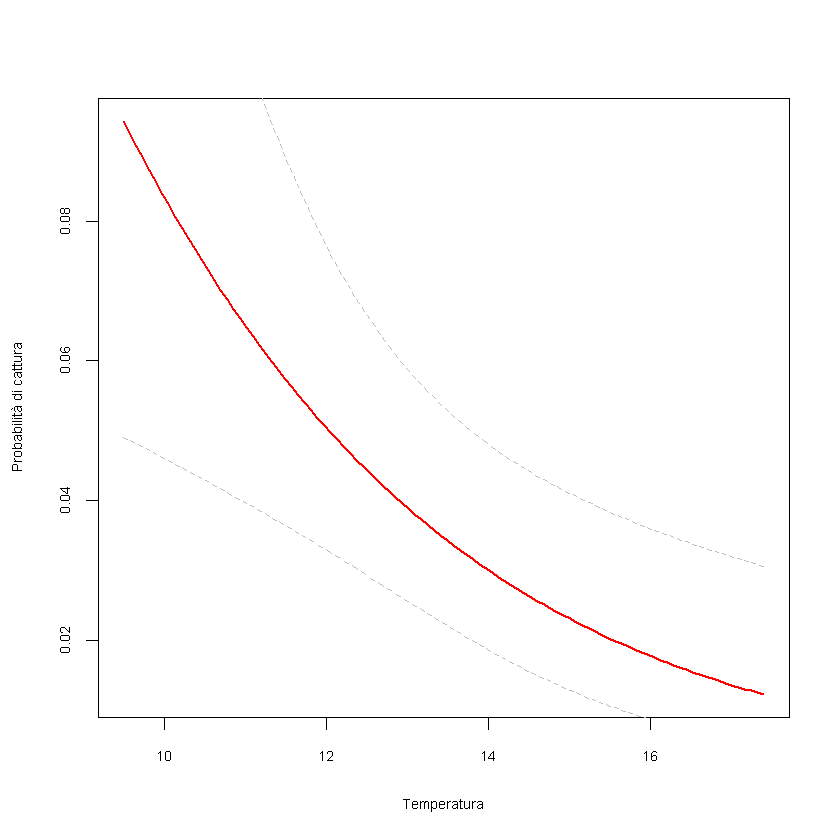

In [50]:
newdat1 <- data.frame(MDR = mean(dati.cov.interesse$MDR),
                      temperatura_occasione = seq(min(temperatura_occasione, na.rm=TRUE), max(temperatura_occasione, na.rm=TRUE), length=100))
Elambda.det <- predict(best.mod, type='det', newdata=newdat1,
                       appendData=TRUE)
with(Elambda.det, {
  plot(temperatura_occasione, Predicted, xlab="Temperatura", type="l", # names = habitat,
       ylab="Probabilità di cattura", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
  # lines(temperatura_occasione, Predicted+SE, lty=3, col="dark grey")
  # lines(temperatura_occasione, Predicted-SE, lty=3, col="dark grey")
  lines(temperatura_occasione, upper, lty=2, col="grey")
  lines(temperatura_occasione, lower, lty=2, col="grey")
})

